###This notebook contains some usual analysis for LPA
It only works for output format in pdb.

In [1]:
import numpy as np
import pylab as plt
from lpa_pdb_diagnostics import *
from scipy.constants import e, c, m_e, epsilon_0
%matplotlib inline

Setting the directory path:

In [2]:
dir_path = "//Volumes/Orsay/circ_a01.1_foc1.9mm_400um_dens7.8_nzplambda50/data/"

#Laser - Plasma Parameters
Here we define some of the laser plasma parameters.

In [3]:
# Some definitions of the laser plasma parameters
lambda0 = 0.8e-6
w0 = 2*np.pi*c/lambda0
laser_waist = 17e-6
plasma_dens = 7.8e24
plasma_length = 3e-3
wp = np.sqrt(plasma_dens * e**2/ (epsilon_0 * m_e))
lambda_plasma = 2*np.pi*c/wp

#Numerical Parameters
Here we define the necessary numerical parameters for the analysis

In [4]:
zmin = -8*lambda_plasma
zmax = 2*lambda0
nzplambda = 50
w_size = zmax - zmin
Nz = int(w_size*nzplambda/lambda0)
dz = w_size/Nz

#Generate values for file reading

In [5]:
inf = 0
sup = 0
period_int = 1000
period_ext = 1000
val = values( inf, sup, period_int, period_ext, plasma_length/dz )
longitudinal_position = val*dz

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


We create an array of file names that we analyze.

In [6]:
field = np.empty(len(val),dtype="S100")
N5 = np.empty(len(val),dtype="S100")
N6 = np.empty(len(val),dtype="S100")
N7 = np.empty(len(val),dtype="S100")
H = np.empty(len(val),dtype="S100")

# Initialize file names
for i, v in enumerate(val):
    field[i] = dir_path + "fields%06d.pdb" %v
    N5[i] = dir_path + "N5%06d.pdb" %v
    N6[i] = dir_path + "N6%06d.pdb" %v
    N7[i] = dir_path + "N7%06d.pdb" %v
    H[i] = dir_path + "H%06d.pdb" %v

#Reading files

We can either read a single file, or we can read a number of files using a loop.

##Single file reading

Example Case: Evaluation of laser c$\tau$ at one given instant
The instant that I would like to investigate is at $1.5mm$.

In [7]:
it_instant = int(2.0e-3/dz/period_int) #round off to the nearest 1000
f = FieldInstant(field[it_instant], np.pi/2, 
                 quantities= ["E", "zfield", "densH", "densN5", "densN6", "densN7"])

** Processing ** Fields: Intialisation of //Volumes/Orsay/circ_a01.1_foc1.9mm_400um_dens7.8_nzplambda50/data/fields125000.pdb **


####Zero crossing analysis

In [8]:
buckets = f.wakefield_zero_crossing()

###Fields analysis

####2D laser field

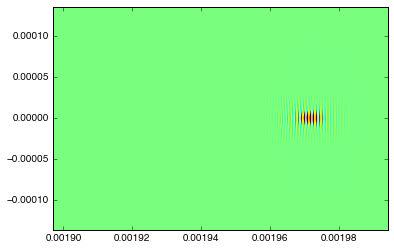

In [9]:
fig, axarr = plt.subplots(dpi = 150)
fig.patch.set_facecolor('white')
plt.imshow(f.laser_field, aspect = 'auto', extent = f.extent )

####1D laser field

(1896.9121114855629, 1994.138787293424)

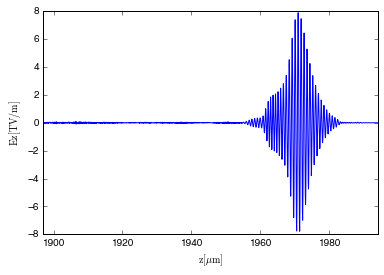

In [10]:
fig, axarr = plt.subplots(dpi = 150)
fig.patch.set_facecolor('white')
axarr.plot( np.array(f.zfield)*1e6, np.array(f.laser_field[int(f.shape[0]/2),:])*1e-12 )
axarr.set_xlabel(r"$\mathrm{z[\mu m]}$")
axarr.set_ylabel(r"$\mathrm{Ez[TV/m]}$")
axarr.set_xlim( min(np.array(f.zfield)*1e6), max(np.array(f.zfield)*1e6))

####Laser c$\tau$

In [11]:
f.laser_ctau()

1.9814936199213249e-05

####Laser envelop

(1897.2481483835163, 1994.0747802652425)

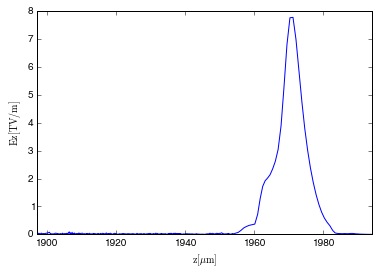

In [12]:
z, env = f.laser_envelop()
#Plotting
fig, axarr = plt.subplots(dpi = 150)
fig.patch.set_facecolor('white')
axarr.plot( np.array(z)*1e6, np.array(env)*1e-12 )
axarr.set_xlabel(r"$\mathrm{z[\mu m]}$")
axarr.set_ylabel(r"$\mathrm{Ez[TV/m]}$")
axarr.set_xlim( min(np.array(z)*1e6), max(np.array(z)*1e6))

####2D wakefield

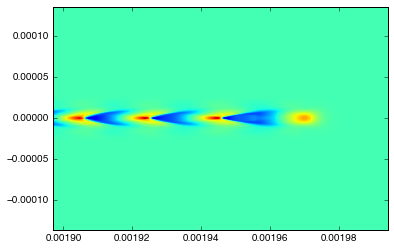

In [13]:
fig.patch.set_facecolor('white')
plt.imshow(f.ez, aspect = 'auto', extent = f.extent )

####1D wakefield

(1897.2481483835163, 1994.0747802652425)

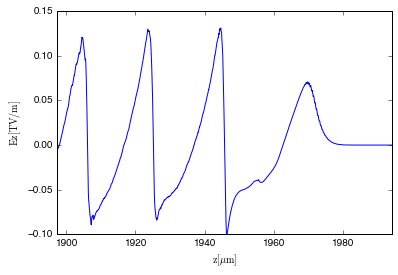

In [14]:
fig, axarr = plt.subplots(dpi = 150)
fig.patch.set_facecolor('white')
axarr.plot( np.array(f.zfield)*1e6, np.array(f.ez[int(f.shape[0]/2),:])*1e-12 )
axarr.set_xlabel(r"$\mathrm{z[\mu m]}$")
axarr.set_ylabel(r"$\mathrm{E_z[TV/m]}$")
axarr.set_xlim( min(np.array(z)*1e6), max(np.array(z)*1e6))

###Particle analysis

####Beam spectrum
Instantiate partilcle objects

In [15]:
HH = ParticleInstant(H[it_instant], quantities = ["PID", "Weight", "Position", "Momentum"])
N66 = ParticleInstant(N6[it_instant])
N77 = ParticleInstant(N7[it_instant])

** Processing ** Particles: Initialisation of //Volumes/Orsay/circ_a01.1_foc1.9mm_400um_dens7.8_nzplambda50/data/H125000.pdb **
** Processing ** Particles: Initialisation of //Volumes/Orsay/circ_a01.1_foc1.9mm_400um_dens7.8_nzplambda50/data/N6125000.pdb **
** Processing ** Particles: Initialisation of //Volumes/Orsay/circ_a01.1_foc1.9mm_400um_dens7.8_nzplambda50/data/N7125000.pdb **


We choose particles, two parameters of choice are offered: gamma_threshold and region of interest.

In [16]:
# we choose particles which have a gamma threshold between 40 to 400 
#and situated in the first accelerating bucket 
cPH, qdict = HH.select( gamma_threshold = [40,400], ROI = buckets[0])
cPN6, qdict = N66.select( gamma_threshold = [40,400], ROI = buckets[0])
cPN7, qdict = N77.select( gamma_threshold = [40,400], ROI = buckets[0])

Group all the particles before doing beam spectrum analysis

In [17]:
xa = [cPN6[qdict["x"]]] + [cPN7[qdict["x"]]]
ya = [cPN6[qdict["y"]]] + [cPN7[qdict["y"]]]
za =  [cPN6[qdict["z"]]] + [cPN7[qdict["z"]]]
uxa =  [cPN6[qdict["ux"]]] + [cPN7[qdict["ux"]]]
uya =  [cPN6[qdict["uy"]]] + [cPN7[qdict["uy"]]]
uza =  [cPN6[qdict["uz"]]] + [cPN7[qdict["uz"]]]
wa = [cPN6[qdict["w"]]] + [cPN7[qdict["w"]]]
ga =  [cPN6[qdict["gamma"]]] + [cPN7[qdict["gamma"]]]

In [18]:
energy, dQdE = beam_spectrum(ga, wa, lwrite=True)

A file named BeamSpectrum in /Users/pmlee/Documents/LPA_PDB_diagnostics/result/ is created.


lpa_pdb_diagnostics/file_handling.py:62: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.groups != None:
lpa_pdb_diagnostics/file_handling.py:90: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.groups!=None:


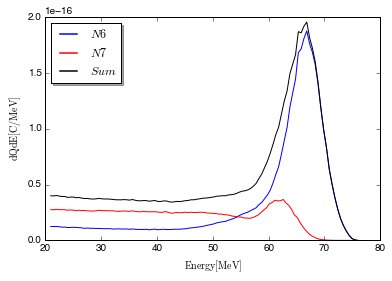

In [19]:
f = plt.figure(dpi = 120)
f.patch.set_facecolor('white')
num_species = np.shape(energy)[0]
c=[ "blue","red","black"]
l = [r"$N6$", r"$N7$", r"$Sum$"]

for i in xrange(num_species):   

    plt.plot( energy[i], dQdE[i], color=c[i], label =l[i])
    
plt.xlabel(r"$\mathrm{Energy[MeV]}$")
plt.ylabel(r"$\mathrm{dQdE[C/MeV]}$")

# Now add the legend with some customizations.
legend = plt.legend(loc='best', shadow=True)

# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')

for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width

####Beam peak evaluation and beam energy spread
We use the total energy spectrum to evaluate these properties.

In [20]:
t_energy = energy[-1]
t_dQdE = dQdE[-1]
Ipeak, Epeak, Cpeak = beam_peak( t_energy, t_dQdE)
peak=(Ipeak[-1], Epeak[-1], Cpeak[-1])
print "Peaks are situated at:"
print "Index : ", Ipeak
print "Energy: ", Epeak
print "Charge: ", Cpeak

Peaks are situated at:
Index :  [4, 91]
Energy:  [ 22.96115007  66.82656567]
Charge:  [  3.93277598e-17   1.95635417e-16]


In [21]:
deltaE , deltaEE = beam_energy_spread( t_energy, t_dQdE, peak = peak)
print "Delta E: %f MeV, Delta E/E: %f" %(deltaE, deltaEE)

Delta E: 8.385415 MeV, Delta E/E: 0.125480


####Beam emittance

In transverse directions

In [22]:
#emitx = beam_emittance( xa, uxa, wa )
#emity = beam_emittance( ya, uya, wa )
#print "Emittance in x-direction: ", emitx
#print "Emittance in y-direction: ", emity

##Multiple files reading

####Laser $a_0$

In [23]:
a0 = []
z_a0 = []
for index in xrange(len(val)):
    f = FieldInstant( field[index], np.pi/2, 
                 quantities= ["E", "zfield", "densH", "densN5", "densN6", "densN7"] )
    a, z = f.laser_a0(w0)
    a0.append(a)
    z_a0.append(z)

** Processing ** Fields: Intialisation of //Volumes/Orsay/circ_a01.1_foc1.9mm_400um_dens7.8_nzplambda50/data/fields001000.pdb **
** Processing ** Fields: Intialisation of //Volumes/Orsay/circ_a01.1_foc1.9mm_400um_dens7.8_nzplambda50/data/fields002000.pdb **
** Processing ** Fields: Intialisation of //Volumes/Orsay/circ_a01.1_foc1.9mm_400um_dens7.8_nzplambda50/data/fields003000.pdb **
** Processing ** Fields: Intialisation of //Volumes/Orsay/circ_a01.1_foc1.9mm_400um_dens7.8_nzplambda50/data/fields004000.pdb **
** Processing ** Fields: Intialisation of //Volumes/Orsay/circ_a01.1_foc1.9mm_400um_dens7.8_nzplambda50/data/fields005000.pdb **
** Processing ** Fields: Intialisation of //Volumes/Orsay/circ_a01.1_foc1.9mm_400um_dens7.8_nzplambda50/data/fields006000.pdb **
** Processing ** Fields: Intialisation of //Volumes/Orsay/circ_a01.1_foc1.9mm_400um_dens7.8_nzplambda50/data/fields007000.pdb **
** Processing ** Fields: Intialisation of //Volumes/Orsay/circ_a01.1_foc1.9mm_400um_dens7.8_nzpla

IOError: [Errno 2] No such file or directory: '//Volumes/Orsay/circ_a01.1_foc1.9mm_400um_dens7.8_nzplambda50/data/fields157000.pdb'

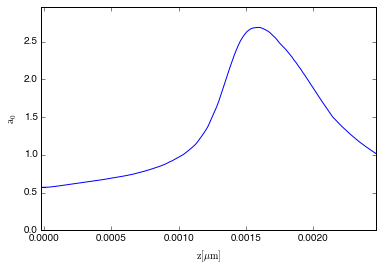

In [28]:
f = plt.figure(dpi = 120)
f.patch.set_facecolor('white')
plt.plot(z_a0[1:], a0[1:])
plt.xlim(min(z_a0), max(z_a0))
plt.ylim(0, 1.1*max(a0))
plt.xlabel(r"$\mathrm{z[\mu m]}$")
plt.ylabel(r"$\mathrm{a_0}$")

In [ ]:
for index in range( len(val)-20, len(val) ):
    f = FieldInstant( field[index], np.pi/2, 
                 quantities= ["E", "zfield", "densH", "densN5", "densN6", "densN7"] )